In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [128]:
df_1 = pd.read_csv('training/prices_round_1_day_-2.csv' , sep = ';')
df_2 = pd.read_csv('training/prices_round_1_day_-1.csv', sep = ';')
df_3 = pd.read_csv('training/prices_round_1_day_0.csv', sep = ';')
df_1['global_timestamp'] = df_1.apply(lambda x: x['day'] * 1000000 + x['timestamp'], axis = 1)
df_2['global_timestamp'] = df_2.apply(lambda x: x['day'] * 1000000 + x['timestamp'], axis = 1)
df_3['global_timestamp'] = df_3.apply(lambda x: x['day'] * 1000000 + x['timestamp'], axis = 1)
df = pd.concat([df_1, df_2, df_3])

In [129]:
df_amethyst = df[df['product'] == 'AMETHYSTS'].reset_index()
df_starfruit = df[df['product'] == 'STARFRUIT'].reset_index()

In [130]:
def calculate_vwap(dataframe):
    """
    Calculate an approximate VWAP using multiple levels of order book data.
    
    Parameters:
    - dataframe: A pandas DataFrame with columns for multiple bid and ask prices and volumes.
    
    Returns:
    - vwap: The calculated VWAP as a float.
    """
    # Initialize variables to store the sum of price*volume products and the sum of volumes
    total_price_volume = 0
    total_volume = 0
    dataframe.fillna(0, inplace = True)
    
    # Iterate through the bid and ask levels
    for i in range(1, 4):  # Assuming 3 levels as per your DataFrame structure
        bid_price_col = f'bid_price_{i}'
        bid_volume_col = f'bid_volume_{i}'
        ask_price_col = f'ask_price_{i}'
        ask_volume_col = f'ask_volume_{i}'
        
        # Calculate the product of price and volume for both bid and ask, and add to total
        total_price_volume += (dataframe[bid_price_col] * dataframe[bid_volume_col])
        total_price_volume += (dataframe[ask_price_col] * dataframe[ask_volume_col])
        
        # Sum up the volumes for both bid and ask
        total_volume += dataframe[bid_volume_col]
        total_volume += dataframe[ask_volume_col]
    
    # Calculate and return the VWAP
    vwap = total_price_volume / total_volume
    return vwap


In [131]:
def calculate_imbalance(dataframe):
    flag = 0
    dataframe.fillna(0, inplace = True)
    bid_volume, ask_volume = 0, 0
    
    # Iterate through the bid and ask levels
    for i in range(1, 4):  # Assuming 3 levels as per your DataFrame structure
        bid_volume_col = f'bid_volume_{i}'
        ask_volume_col = f'ask_volume_{i}'
        
        # Calculate the product of price and volume for both bid and ask, and add to total
        
        # Sum up the volumes for both bid and ask
        bid_volume += dataframe[bid_volume_col]
        ask_volume += dataframe[ask_volume_col]
    
    if bid_volume > ask_volume:
        flag = 1
    elif bid_volume < ask_volume:
        flag = -1
    # Calculate and return the VWAP
    return abs(bid_volume - ask_volume), flag

In [132]:
df['vwap'] = df.apply(calculate_vwap, axis = 1)
df_amethyst['vwap'] = df_amethyst.apply(calculate_vwap, axis = 1)
df_starfruit['vwap'] = df_starfruit.apply(calculate_vwap, axis = 1)

### Amethyst

In [133]:
df_amethyst['MA_50'] = df_amethyst['mid_price'].rolling(50).mean()
df_amethyst['MA_30'] = df_amethyst['mid_price'].rolling(30).mean()
df_amethyst['MA_10'] = df_amethyst['mid_price'].rolling(10).mean()

df_amethyst['spread'] = df_amethyst['bid_price_1'] - df_amethyst['ask_price_1']
df_amethyst[['imbalance_volume', 'imbalance_volume_flag']] = df_amethyst.apply(calculate_imbalance, axis = 1, result_type='expand')

df_amethyst.describe()

,index,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,mid_price,profit_and_loss,global_timestamp,vwap,MA_50,MA_30,MA_10,spread,imbalance_volume,imbalance_volume_flag
count,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,22311.000000,22311.000000,5141.000000,5141.000000,30000.000000,...,30000.000000,30000.0,3.000000e+04,30000.000000,29951.000000,29971.000000,29991.000000,30000.000000,30000.000000,30000.000000
mean,9999.459933,-1.00000,499950.000000,9996.609633,8.218933,9995.290395,19.714939,9995.083252,23.099981,10003.383467,...,9999.996550,0.0,-5.000500e+05,9999.997589,9999.996346,9999.996356,9999.996576,-6.773833,2.549067,0.000800
std,5773.599086,0.81651,288679.944524,1.937861,10.155552,0.634420,10.142682,0.296664,6.997590,1.949362,...,1.496592,0.0,8.660398e+05,0.576303,0.212573,0.274374,0.476439,2.480219,4.001324,0.696861
min,0.000000,-2.00000,0.000000,9995.000000,0.000000,9995.000000,1.000000,9995.000000,1.000000,9998.000000,...,9996.500000,0.0,-2.000000e+06,9995.666667,9999.200000,9998.966667,9997.950000,-10.000000,0.000000,-1.000000
25%,4999.750000,-2.00000,249975.000000,9995.000000,1.000000,9995.000000,20.000000,9995.000000,22.000000,10004.000000,...,10000.000000,0.0,-1.250025e+06,10000.000000,9999.850000,9999.800000,9999.700000,-8.000000,0.000000,0.000000
50%,9999.500000,-1.00000,499950.000000,9996.000000,2.000000,9995.000000,23.000000,9995.000000,24.000000,10004.000000,...,10000.000000,0.0,-5.000500e+05,10000.000000,10000.000000,10000.000000,10000.000000,-8.000000,0.000000,0.000000
75%,14999.250000,0.00000,749925.000000,9996.000000,20.000000,9995.000000,27.000000,9995.000000,27.000000,10005.000000,...,10000.000000,0.0,2.499250e+05,10000.000000,10000.140000,10000.183333,10000.300000,-6.000000,4.000000,0.000000
max,19999.000000,0.00000,999900.000000,10002.000000,30.000000,10000.000000,30.000000,9998.000000,30.000000,10005.000000,...,10003.500000,0.0,9.999000e+05,10004.411765,10000.710000,10001.000000,10002.150000,-2.000000,28.000000,1.000000


In [134]:
df_amethyst['mid_price'].max()

10003.5

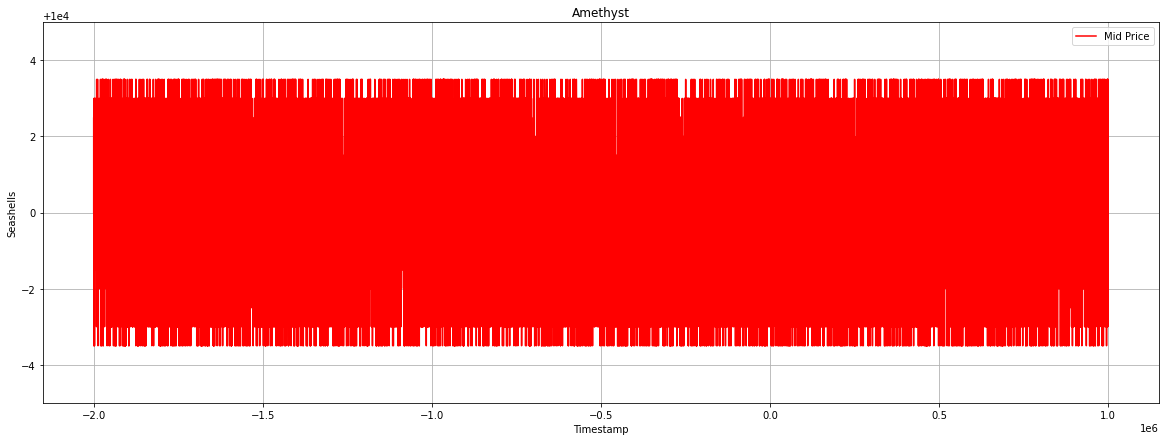

In [152]:
# df_amethyst.set_index('global_timestamp', inplace=True)
plt.figure(figsize=(20, 7))
# plt.plot(df_amethyst['vwap'], label = 'VWAP', color = 'g', linestyle='--')
plt.plot(df_amethyst['mid_price'], label = 'Mid Price', color = 'r')
# plt.plot(df_amethyst['MA_10'], label = 'MA_10', color = 'b', linewidth = 2, linestyle = 'dotted')
# plt.plot(df_amethyst['MA_30'], label = 'MA_30', color = 'y', linewidth = 2, linestyle = 'dotted')
# plt.plot(df_amethyst['MA_50'], label = 'MA_50', color = 'k', linewidth = 2, linestyle = 'dotted')


plt.title('Amethyst')
plt.ylim(9995, 10005)
plt.xlabel('Timestamp')
plt.ylabel('Seashells')
plt.legend()
plt.grid(True)
plt.show()

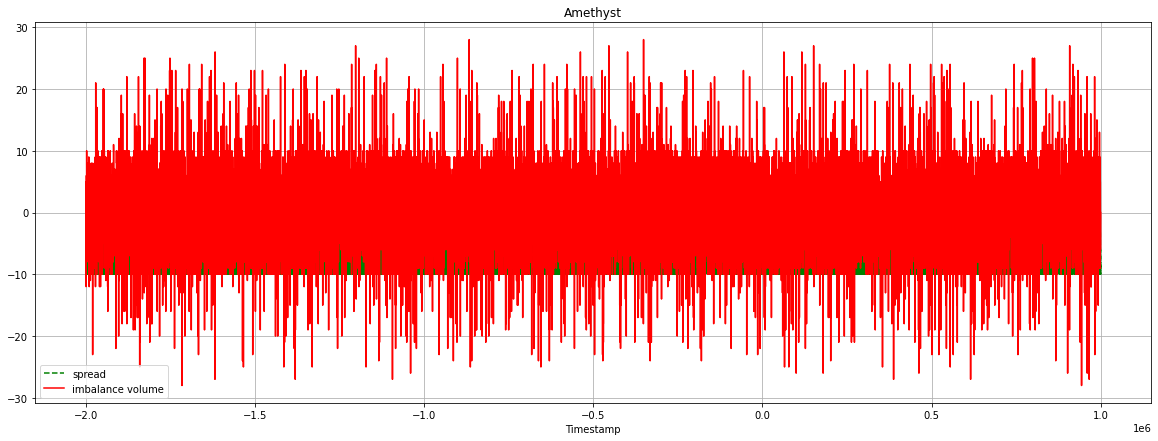

In [155]:
#df_amethyst.set_index('global_timestamp', inplace=True)
plt.figure(figsize=(20, 7))
plt.plot(df_amethyst['spread'], label = 'spread', color = 'g', linestyle='--')
plt.plot(df_amethyst['imbalance_volume'] * df_amethyst['imbalance_volume_flag'], label = 'imbalance volume', color = 'r')
# plt.plot(df_amethyst['MA_10'], label = 'MA_10', color = 'b', linewidth = 2, linestyle = 'dotted')
# plt.plot(df_amethyst['MA_30'], label = 'MA_30', color = 'y', linewidth = 2, linestyle = 'dotted')
# plt.plot(df_amethyst['MA_50'], label = 'MA_50', color = 'k', linewidth = 2, linestyle = 'dotted')


plt.title('Amethyst')
plt.xlabel('Timestamp')
plt.legend()
plt.grid(True)
plt.show()

In [138]:
df_amethyst.loc[:5,'mid_price']

0    10000.0
1    10002.5
2    10000.0
3    10000.0
4     9996.5
5    10000.0
Name: mid_price, dtype: float64

### Starfruit

In [136]:
df_starfruit['MA_50'] = df_starfruit['mid_price'].rolling(50).mean()
df_starfruit['MA_30'] = df_starfruit['mid_price'].rolling(30).mean()
df_starfruit['MA_10'] = df_starfruit['mid_price'].rolling(10).mean()
df_starfruit['MA_200'] =df_starfruit['mid_price'].rolling(200).mean() 
df_starfruit.describe()

,index,day,timestamp,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_price_3,ask_volume_3,mid_price,profit_and_loss,global_timestamp,vwap,MA_50,MA_30,MA_10,MA_200
count,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,11281.000000,11281.000000,1257.000000,1257.000000,30000.000000,...,1507.000000,1507.000000,30000.000000,30000.0,3.000000e+04,30000.000000,29951.000000,29971.000000,29991.000000,29801.000000
mean,9999.540067,-1.00000,499950.000000,5034.725867,17.231233,5033.924652,23.089354,5034.486078,24.445505,5040.125467,...,5040.962177,24.140677,5037.425667,0.0,-5.000500e+05,5037.408121,5037.443502,5037.436565,5037.429130,5037.494266
std,5773.598738,0.81651,288679.944524,32.295106,11.463485,32.358842,7.627033,31.662255,5.550328,32.340010,...,32.504764,5.950782,32.303047,0.0,8.660398e+05,32.273772,32.267076,32.273809,32.281195,32.217369
min,1.000000,-2.00000,0.000000,4948.000000,1.000000,4948.000000,1.000000,4949.000000,1.000000,4951.000000,...,4956.000000,1.000000,4950.500000,0.0,-2.000000e+06,4951.288462,4953.020000,4952.416667,4951.750000,4955.982500
25%,5000.500000,-2.00000,249975.000000,5025.000000,3.000000,5024.000000,22.000000,5024.000000,22.000000,5031.000000,...,5031.000000,22.000000,5028.000000,0.0,-1.250025e+06,5028.198516,5027.980000,5028.108333,5028.050000,5028.775000
50%,10000.000000,-1.00000,499950.000000,5045.000000,23.000000,5045.000000,25.000000,5045.000000,25.000000,5051.000000,...,5052.000000,25.000000,5048.000000,0.0,-5.000500e+05,5048.377049,5048.270000,5048.266667,5048.250000,5048.082500
75%,14999.250000,0.00000,749925.000000,5056.000000,27.000000,5055.000000,28.000000,5056.000000,28.000000,5062.000000,...,5063.000000,28.000000,5059.000000,0.0,2.499250e+05,5058.617781,5058.960000,5058.916667,5058.800000,5058.595000
max,19999.000000,0.00000,999900.000000,5093.000000,32.000000,5092.000000,32.000000,5088.000000,32.000000,5095.000000,...,5096.000000,32.000000,5093.500000,0.0,9.999000e+05,5094.210526,5089.660000,5090.233333,5091.450000,5087.405000


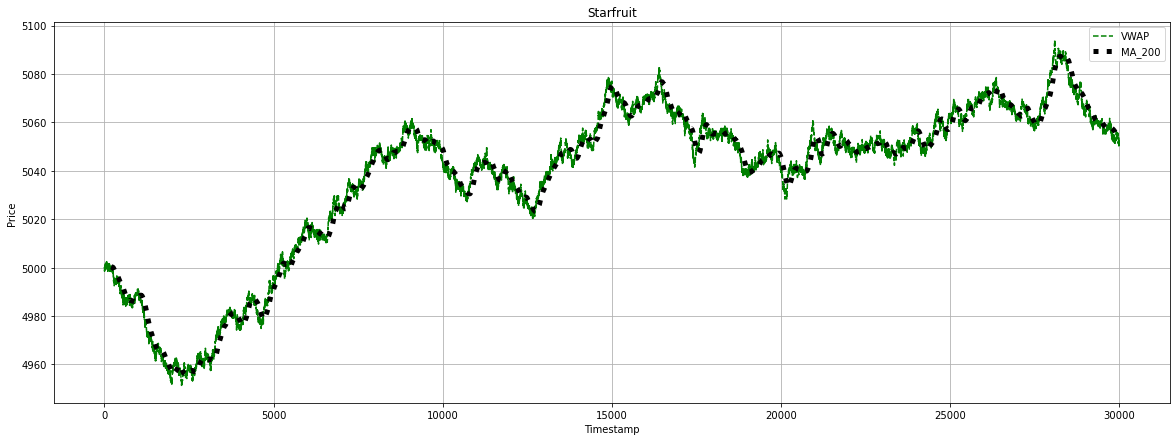

In [137]:
#df_amethyst.set_index('global_timestamp', inplace=True)
plt.figure(figsize=(20, 7))
plt.plot(df_starfruit['vwap'], label = 'VWAP', color = 'g', linestyle='--')
#plt.plot(df_starfruit['mid_price'], label = 'Mid Price', color = 'r')
# plt.plot(df_starfruit['MA_10'], label = 'MA_10', color = 'b', linewidth = 2, linestyle = 'dotted')
# plt.plot(df_starfruit['MA_30'], label = 'MA_30', color = 'y', linewidth = 2, linestyle = 'dotted')
plt.plot(df_starfruit['MA_200'], label = 'MA_200', color = 'k', linewidth = 5, linestyle = 'dotted')

plt.title('Starfruit')
plt.xlabel('Timestamp')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()